# Introduction to Data Analysis with Python


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>

# Objectives

* Handle tabular data with `pandas`

# The Python scientific stack: SciPy

Python Main Data Libraries

NumPy: Base N-dimensional array package

SciPy library: Fundamental library for scientific computing

Matplotlib: Comprehensive 2D Plotting

IPython: Enhanced Interactive Console

Sympy: Symbolic mathematics

pandas: Data structures & analysis

## `matplotlib`

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

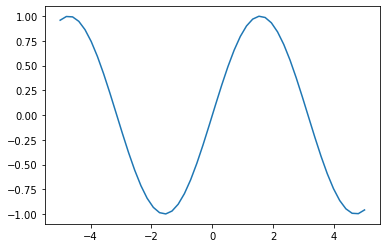

In [10]:
#create a sin range -5 to 5

xs =  np.linspace(-5,5)
ys = np.sin(xs)

plt.plot(xs,ys)

## `pandas`

### Getting started with pandas

### `pandas` data structures

### Series

The base pandas abstraction. You can thing of it as the love child of a numpy array and a dictionary.

In [11]:
s = pd.Series([8,32,51,1])
s

0     8
1    32
2    51
3     1
dtype: int64

In [12]:
pd.Series([8,32,51,1.1])

0     8.0
1    32.0
2    51.0
3     1.1
dtype: float64

In [13]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [14]:
s.values

array([ 8, 32, 51,  1])

If we provide an index, pandas will use it. If not, it will automatically create one.

In [15]:
s2 = pd.Series([22,54,2,8],index = ['a','b','c','d'])
s2

a    22
b    54
c     2
d     8
dtype: int64

We can create Series from dictionaries:

In [16]:
dict = {'a': 22, 'b': 54, 'c': 2, 'd': 8}
pd.Series(dict)

a    22
b    54
c     2
d     8
dtype: int64

And here is where the magic happens: numpy arrays only identify their contents by position. In contrast, pandas knows their "name" and will align them based on their indexes:

In [17]:
s2['a']

22

In [18]:
s2[s2 > 20]

a    22
b    54
dtype: int64

### DataFrame

This is the object you'll work most of the time with. It represents a table of _m_ observations x _n_ variables. Each variable, or column, is a Series.


```python
dfdata = {
    'province' : ['M', 'M', 'M', 'B', 'B'],
    'population': [1.5e6, 2e6, 3e6, 5e5, 1.5e6],
    'year' : [1900, 1950, 2000, 1900, 2000]   
}

df = pd.DataFrame(dfdata)
```

In [19]:
dfdata = {
    'province' : ['M', 'M', 'M', 'B', 'B'],
    'population': [1.5e6, 2e6, 3e6, 5e5, 1.5e6],
    'year' : [1900, 1950, 2000, 1900, 2000]   
}

df = pd.DataFrame(dfdata)
df

,province,population,year
0,M,1500000.0,1900
1,M,2000000.0,1950
2,M,3000000.0,2000
3,B,500000.0,1900
4,B,1500000.0,2000


In [20]:
pd.DataFrame(dfdata, columns = ['year','province'])

,year,province
0,1900,M
1,1950,M
2,2000,M
3,1900,B
4,2000,B


In [21]:
df.population # Bad!!

0    1500000.0
1    2000000.0
2    3000000.0
3     500000.0
4    1500000.0
Name: population, dtype: float64

In [22]:
df['population']  # Good!

0    1500000.0
1    2000000.0
2    3000000.0
3     500000.0
4    1500000.0
Name: population, dtype: float64

In [23]:
df.index = list('abcde')

In [24]:
#We use loc with the index name
df.loc['a']

province              M
population    1500000.0
year               1900
Name: a, dtype: object

In [25]:
#We use iloc with the index
df.iloc[0]

province              M
population    1500000.0
year               1900
Name: a, dtype: object

In [26]:
df['capital'] = df['province'] == 'M'
df

,province,population,year,capital
a,M,1500000.0,1900,True
b,M,2000000.0,1950,True
c,M,3000000.0,2000,True
d,B,500000.0,1900,False
e,B,1500000.0,2000,False


In [27]:
df.describe()

,population,year
count,5.000000e+00,5.0
mean,1.700000e+06,1950.0
std,9.082951e+05,50.0
min,5.000000e+05,1900.0
25%,1.500000e+06,1900.0
50%,1.500000e+06,1950.0
75%,2.000000e+06,2000.0
max,3.000000e+06,2000.0


### Index objects

Indexes are immutable.

In [28]:
#Not possible to change a single index you have to change completely
#df.index[2] = 'x' #Bad!!

### Dropping entries from an axis

In [29]:
df.drop(['a','d'])

,province,population,year,capital
b,M,2000000.0,1950,True
c,M,3000000.0,2000,True
e,B,1500000.0,2000,False


By default, `drop()` doesn't modify the original Series- it creates a copy. We can change that with the argument `inplace`.

In [30]:
df2 =df.copy()
df2

,province,population,year,capital
a,M,1500000.0,1900,True
b,M,2000000.0,1950,True
c,M,3000000.0,2000,True
d,B,500000.0,1900,False
e,B,1500000.0,2000,False


In [31]:
df2.drop(['a','e'], inplace = True)
df2

,province,population,year,capital
b,M,2000000.0,1950,True
c,M,3000000.0,2000,True
d,B,500000.0,1900,False


### Indexing, selection, and filtering

The key here is that we can build boolean Series that we can use to index the original Series or DataFrame. Those booleans can be combined with bitwise boolean operators (&, |, ~) to get filters that are as complex as we need. 

In [32]:
s

0     8
1    32
2    51
3     1
dtype: int64

In [33]:
s[0]

8

In [34]:
s[1]

32

In [35]:
s.loc[1]

32

In [36]:
df['year']

a    1900
b    1950
c    2000
d    1900
e    2000
Name: year, dtype: int64

In [37]:
df[df['year'] > 1970]

,province,population,year,capital
c,M,3000000.0,2000,True
e,B,1500000.0,2000,False


In [38]:
post_war = df['year'] > 1939

df[post_war]

,province,population,year,capital
b,M,2000000.0,1950,True
c,M,3000000.0,2000,True
e,B,1500000.0,2000,False


In [39]:
df[['province','population','year']][post_war]

,province,population,year
b,M,2000000.0,1950
c,M,3000000.0,2000
e,B,1500000.0,2000


In [40]:
df[(df['year'] >= 1950) & (df['province'] == 'M')]

,province,population,year,capital
b,M,2000000.0,1950,True
c,M,3000000.0,2000,True


### Function application and mapping

Function application and mapping allows us to modify the elements of a DataFrame (columns with apply or elements with applymap) without for loops. This way we are not constrained to the functions already implemented by pandas or numpy.

In [41]:
#applymap take all cells
df.applymap(lambda cell_value : str(cell_value)[0])

,province,population,year,capital
a,M,1,1,T
b,M,2,1,T
c,M,3,2,T
d,B,5,1,F
e,B,1,2,F


This is a typical use case for lambdas (anonymous functions)

In [42]:
# apply take only columns
df.apply(lambda column: column.max())

province              M
population    3000000.0
year               2000
capital            True
dtype: object

### Sorting and ranking

In [43]:
#We use inplace = True in case we want change the original df
df.sort_values(by='year')

,province,population,year,capital
a,M,1500000.0,1900,True
d,B,500000.0,1900,False
b,M,2000000.0,1950,True
c,M,3000000.0,2000,True
e,B,1500000.0,2000,False


In [44]:
df.sort_values(by = ['year','province'])

,province,population,year,capital
d,B,500000.0,1900,False
a,M,1500000.0,1900,True
b,M,2000000.0,1950,True
e,B,1500000.0,2000,False
c,M,3000000.0,2000,True


In [45]:
df.sort_index()

,province,population,year,capital
a,M,1500000.0,1900,True
b,M,2000000.0,1950,True
c,M,3000000.0,2000,True
d,B,500000.0,1900,False
e,B,1500000.0,2000,False


In [46]:
#We use axis =1 in case we want to order using the index of the columns
df.sort_index(axis = 1)

,capital,population,province,year
a,True,1500000.0,M,1900
b,True,2000000.0,M,1950
c,True,3000000.0,M,2000
d,False,500000.0,B,1900
e,False,1500000.0,B,2000


rank() returns the positions of the elements of the Series in its sorted version. If there are ties, it will take averages.

In [47]:
standings = pd.Series({'RM': 45, 'VCF': 56,'VIL': 27, 'FCB': 45})

In [48]:
standings.rank()

RM     2.5
VCF    4.0
VIL    1.0
FCB    2.5
dtype: float64

In [49]:
standings.rank(method = 'dense',ascending = False)

RM     2.0
VCF    1.0
VIL    3.0
FCB    2.0
dtype: float64

#### Exercise

Write a function that takes a Series and returns the top 20% registers. In this case, earners. Test it with this Series:

```python
salaries = pd.Series([10000, 43000, 150000, 90000, 120000,30000,10000,5000,40000, 50000, 80000, 35000, 27000,14000, 28000, 22000, 25000])
```

In [50]:
salaries = pd.Series([10000, 43000, 150000, 90000, 120000,30000,10000,5000,40000, 50000, 80000, 35000, 27000,14000, 28000, 22000, 25000])
def return_20_percentage(series):
    return series.sort_values(ascending= False)[:int(len(series)*0.2)]

return_20_percentage(salaries)

2    150000
4    120000
3     90000
dtype: int64

In [51]:
#Another way to do it
def top_n_percent(series,pct = .2):
    
    percentiles = series.rank(pct = True, ascending = False)
    
    return series[percentiles <  pct]

top_n_percent(salaries)


2    150000
3     90000
4    120000
dtype: int64

## Summarizing and computing descriptive statistics

In [52]:
salaries.min()

5000

In [53]:
salaries.max()

150000

In [54]:
salaries.describe()

count        17.000000
mean      45823.529412
std       40942.391378
min        5000.000000
25%       22000.000000
50%       30000.000000
75%       50000.000000
max      150000.000000
dtype: float64

In [55]:
salaries.median()

30000.0

As with many methods, we can use them in the direction perpendicular to their default.

In [56]:
#Not normally used
df[['population','year']].mean(axis =1)

a     750950.0
b    1000975.0
c    1501000.0
d     250950.0
e     751000.0
dtype: float64

### Unique values, value counts, and membership

In [57]:
df['province'].unique()

array(['M', 'B'], dtype=object)

In [58]:
df['province'].nunique()

2

In [59]:
df['province'].isin(['B','Gi','Ll','T'])

a    False
b    False
c    False
d     True
e     True
Name: province, dtype: bool

In [60]:
df.nunique()

province      2
population    4
year          3
capital       2
dtype: int64

#### Exercise

Calculate the %GC of the following DNA sequence:

```python
dna = pd.Series(list('agtcgggaactttctctcgaggagacccaa'))
```

In [61]:
dna = pd.Series(list('agtcgggaactttctctcgaggagacccaa'))

(dna[(dna == 'g') | (dna == 'c')].count()) *(100/len(dna))

53.333333333333336

In [64]:
dna.isin(['g','c']).mean() *100

53.333333333333336

## Handling missing data

In [67]:
strings = pd.Series( ['Ma','Va','Ca',np.nan])
strings

0     Ma
1     Va
2     Ca
3    NaN
dtype: object

This is weird... but it has some really good reasons. You can find explanations [here](https://stackoverflow.com/questions/10034149/why-is-nan-not-equal-to-nan) and [here](https://stackoverflow.com/questions/1565164/what-is-the-rationale-for-all-comparisons-returning-false-for-ieee754-nan-values)

In [68]:
strings.dropna()
strings

0     Ma
1     Va
2     Ca
3    NaN
dtype: object

In [73]:
np.nan == np.nan

False

In [74]:
strings.fillna('Po')

0    Ma
1    Va
2    Ca
3    Po
dtype: object

In [76]:
data = {'X': [1,2,3,4,np.nan,np.nan],
       'Y': [6,np.nan,7,np.nan,np.nan,9],
        'Z' : [10,11,12,np.nan,np.nan,13]}

df2 = pd.DataFrame(data)
df2

,X,Y,Z
0,1.0,6.0,10.0
1,2.0,NaN,11.0
2,3.0,7.0,12.0
3,4.0,NaN,NaN
4,NaN,NaN,NaN
5,NaN,9.0,13.0


In [78]:
df2.fillna({'X': 999, 'Y' : 666})

,X,Y,Z
0,1.0,6.0,10.0
1,2.0,666.0,11.0
2,3.0,7.0,12.0
3,4.0,666.0,NaN
4,999.0,666.0,NaN
5,999.0,9.0,13.0


In [79]:
df2.median()

X     2.5
Y     7.0
Z    11.5
dtype: float64

In [81]:
df2.fillna(df2.median())

,X,Y,Z
0,1.0,6.0,10.0
1,2.0,7.0,11.0
2,3.0,7.0,12.0
3,4.0,7.0,11.5
4,2.5,7.0,11.5
5,2.5,9.0,13.0


In [82]:
df2.dropna()

,X,Y,Z
0,1.0,6.0,10.0
2,3.0,7.0,12.0


In [83]:
df2.dropna(how = 'all')

,X,Y,Z
0,1.0,6.0,10.0
1,2.0,NaN,11.0
2,3.0,7.0,12.0
3,4.0,NaN,NaN
5,NaN,9.0,13.0


In [85]:
df2.dropna(thresh = 2)

,X,Y,Z
0,1.0,6.0,10.0
1,2.0,NaN,11.0
2,3.0,7.0,12.0
5,NaN,9.0,13.0


In [86]:
df2.dropna(subset=['X','Y'])

,X,Y,Z
0,1.0,6.0,10.0
2,3.0,7.0,12.0








### Filtering out missing data

any() and all() are functions of boolean Series. They reduce the Series to a single boolean value by applying repeatedly the operators "or" and "and", respectively.

In [91]:
df2.dropna(subset=['Y','Z'],how= 'all')

,X,Y,Z
0,1.0,6.0,10.0
1,2.0,NaN,11.0
2,3.0,7.0,12.0
5,NaN,9.0,13.0


The thresh argument specifies the minimum number of non-null values required to keep a column (or row, with axis=1)

In [90]:
df2.dropna(axis=1, thresh = 1)

,X,Y,Z
0,1.0,6.0,10.0
1,2.0,NaN,11.0
2,3.0,7.0,12.0
3,4.0,NaN,NaN
4,NaN,NaN,NaN
5,NaN,9.0,13.0


### Filling in missing data

In [93]:
df2.ffill()

,X,Y,Z
0,1.0,6.0,10.0
1,2.0,6.0,11.0
2,3.0,7.0,12.0
3,4.0,7.0,12.0
4,4.0,7.0,12.0
5,4.0,9.0,13.0


In [95]:
df2.bfill()

,X,Y,Z
0,1.0,6.0,10.0
1,2.0,7.0,11.0
2,3.0,7.0,12.0
3,4.0,9.0,13.0
4,NaN,9.0,13.0
5,NaN,9.0,13.0


# Loading and saving data

## Loading CSV

In [96]:
!unzip /home/dsc/data/us_dot/traffic/T100_SEGMENT_ALL_CARRIER_2014.zip

Archive:  /home/dsc/data/us_dot/traffic/T100_SEGMENT_ALL_CARRIER_2014.zip
  inflating: 914310910_T_T100_SEGMENT_ALL_CARRIER_2014_All.csv  
  inflating: 914310910_T_T100_SEGMENT_ALL_CARRIER_ReadMe.csv  
  inflating: 914310910_T_T100_SEGMENT_ALL_CARRIER_Terms.csv  


In [97]:
routes = pd.read_csv('914310910_T_T100_SEGMENT_ALL_CARRIER_2014_All.csv')
pd.options.display.max_columns = None
routes.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Unnamed: 50
0,0.0,1.0,43400.0,175.0,158.0,748.0,0.0,1660.0,263.0,243.0,WN,19393,Southwest Airlines Co.,06725,D,WN,Southwest Airlines Co.,3,3,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49.0,Utah,US,United States,87,14122,1412202,30198,PIT,"Pittsburgh, PA",PA,42.0,Pennsylvania,US,United States,23,6,614,1,2014,3,7,4,F,DU,NaN
1,0.0,2.0,69200.0,286.0,167.0,0.0,0.0,532.0,401.0,378.0,WN,19393,Southwest Airlines Co.,06725,D,WN,Southwest Airlines Co.,3,3,14893,1489302,33192,SMF,"Sacramento, CA",CA,6.0,California,US,United States,91,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49.0,Utah,US,United States,87,6,612,1,2014,3,7,2,F,DU,NaN
2,0.0,1.0,34600.0,143.0,142.0,135.0,0.0,752.0,193.0,157.0,WN,19393,Southwest Airlines Co.,06725,D,WN,Southwest Airlines Co.,3,3,14893,1489302,33192,SMF,"Sacramento, CA",CA,6.0,California,US,United States,91,15376,1537602,30436,TUS,"Tucson, AZ",AZ,4.0,Arizona,US,United States,81,6,612,1,2014,3,7,2,F,DU,NaN
3,0.0,1.0,32200.0,143.0,143.0,0.0,0.0,30.0,32.0,17.0,WN,19393,Southwest Airlines Co.,06725,D,WN,Southwest Airlines Co.,3,3,14908,1490803,32575,SNA,"Santa Ana, CA",CA,6.0,California,US,United States,91,13891,1389101,32575,ONT,"Ontario, CA",CA,6.0,California,US,United States,91,6,619,1,2014,3,7,1,F,DU,NaN
4,0.0,2.0,69200.0,286.0,276.0,0.0,0.0,910.0,319.0,296.0,WN,19393,Southwest Airlines Co.,06725,D,WN,Southwest Airlines Co.,3,3,15016,1501603,31123,STL,"St. Louis, MO",MO,29.0,Missouri,US,United States,64,10257,1025702,30257,ALB,"Albany, NY",NY,36.0,New York,US,United States,22,6,612,1,2014,3,7,2,F,DU,NaN


#### Exercise 

Calculate the number of routes to each destination country in the data.

Show all countries with more than 1000 routes.

In [111]:
num_routes = routes['DEST_COUNTRY_NAME'].value_counts()
print(num_routes.loc[num_routes > 1000])

United States         396961
Canada                  7974
Mexico                  6394
United Kingdom          1912
Japan                   1591
Germany                 1391
Dominican Republic      1230
Name: DEST_COUNTRY_NAME, dtype: int64


#### Exercise

Extract the top 10 routes by passenger number. 

I only want to see origin, destination, and number of passengers.

In [117]:
top_ten_passengers = routes.sort_values(by = 'PASSENGERS',ascending= False).head(10)
top_ten_passengers[['ORIGIN_CITY_NAME','DEST_CITY_NAME','PASSENGERS']]

,ORIGIN_CITY_NAME,DEST_CITY_NAME,PASSENGERS
436560,"Kahului, HI","Honolulu, HI",81628.0
436569,"Kahului, HI","Honolulu, HI",78697.0
436561,"Kahului, HI","Honolulu, HI",77961.0
436562,"Honolulu, HI","Kahului, HI",77875.0
436566,"Honolulu, HI","Kahului, HI",77608.0
436567,"Kahului, HI","Honolulu, HI",77471.0
436558,"Honolulu, HI","Kahului, HI",77402.0
436564,"Kahului, HI","Honolulu, HI",77396.0
436563,"Honolulu, HI","Kahului, HI",77304.0
436555,"Honolulu, HI","Kahului, HI",76092.0


## Saving to Excel

In [119]:
top_ten_passengers.to_excel('top_ten_passengers.xlsx')

In [120]:
!ls

03-introduction_to_pandas.empty.ipynb
04-advanced_pandas.empty.ipynb
914310910_T_T100_SEGMENT_ALL_CARRIER_2014_All.csv
914310910_T_T100_SEGMENT_ALL_CARRIER_ReadMe.csv
914310910_T_T100_SEGMENT_ALL_CARRIER_Terms.csv
top_ten_passengers.xlsx


## Saving to CSV

In [121]:
top_ten_passengers.to_csv('top_ten_passengers.csv')

## To Sql Database

In [127]:
import sqlite3


connection = sqlite3.connect()

TypeError: expected str, bytes or os.PathLike object, not DataFrame

## To dictionary and to json

In [124]:
top_ten_passengers.to_dict()

top_ten_passengers.to_json()

'{"DEPARTURES_SCHEDULED":{"436560":820.0,"436569":851.0,"436561":820.0,"436562":823.0,"436566":851.0,"436567":851.0,"436558":820.0,"436564":823.0,"436563":823.0,"436555":818.0},"DEPARTURES_PERFORMED":{"436560":822.0,"436569":848.0,"436561":820.0,"436562":822.0,"436566":850.0,"436567":846.0,"436558":821.0,"436564":808.0,"436563":811.0,"436555":816.0},"PAYLOAD":{"436560":22598800.0,"436569":23414300.0,"436561":22575200.0,"436562":22773800.0,"436566":23453400.0,"436567":23362600.0,"436558":22654100.0,"436564":22260100.0,"436563":22407200.0,"436555":25573300.0},"SEATS":{"436560":99471.0,"436569":102389.0,"436561":99630.0,"436562":99166.0,"436566":102600.0,"436567":102083.0,"436558":99618.0,"436564":97799.0,"436563":98033.0,"436555":98998.0},"PASSENGERS":{"436560":81628.0,"436569":78697.0,"436561":77961.0,"436562":77875.0,"436566":77608.0,"436567":77471.0,"436558":77402.0,"436564":77396.0,"436563":77304.0,"436555":76092.0},"FREIGHT":{"436560":86116.0,"436569":91862.0,"436561":86839.0,"43656

## Reading Excel

In [125]:
reread = pd.read_excel('top_ten_passengers.xlsx')

## Reading mysql database

In [126]:
df3 = pd.read_sql_query('SELECT * FORM routes', connection)

NameError: name 'connection' is not defined

# Additional References

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)

[What is SciPy?](https://www.scipy.org/)

[How can SciPy be fast if it is written in an interpreted language like Python?](https://www.scipy.org/scipylib/faq.html#how-can-scipy-be-fast-if-it-is-written-in-an-interpreted-language-like-python)

[What is the difference between NumPy and SciPy?](https://www.scipy.org/scipylib/faq.html#what-is-the-difference-between-numpy-and-scipy)

[Linear Algebra for AI](https://github.com/fastai/fastai/blob/master/tutorials/linalg_pytorch.ipynb)